## Szybka transformata Fouriera (FFT - Fast Fourier Transform)

Zapoznaj się ze sposobem działania transformacji Fouriera i jej praktycznym zastosowaniem. 

W poniższym ćwiczeniu korzystamy z biblioteki FFT będącej częścią pakietu scipy

In [91]:
from scipy import fft

#### Przykład 
Analiza sygnału wygenerowanego funkcją okresową $sin(2 \pi t)$. Częstotliowścią sygnału określamy liczbę pełnych zmian sygnału w określonej jednostce czasu. Przyjmując przedział $t:[0..1]$ częstotliwość funkcji $f(t) = sin(2 \pi t)$ wynozi 1 Hz. Zwizualizujmy ten sygnał: 

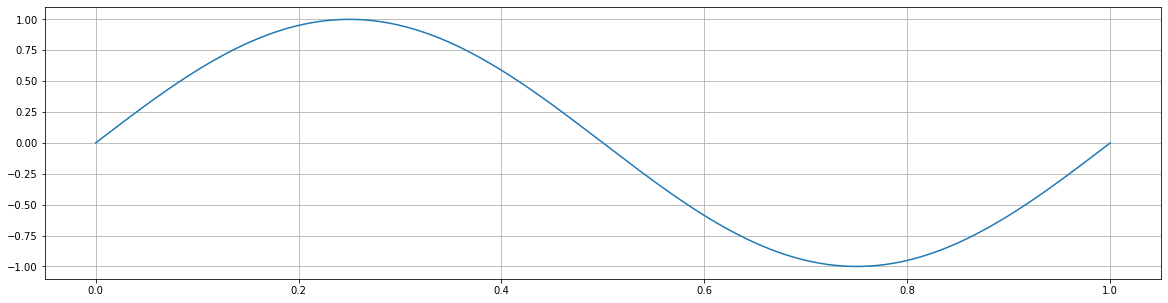

In [92]:
import numpy as np
# liczba próbek 
N = 1000
# częstotliwość 
F=1
t = np.linspace(0.0, 1.0, N)
ft = np.sin(2*np.pi*t*F)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(t,ft)
plt.grid()
plt.show()

Manipulując parametrem F w powyższym kodzie mozemy zmieniać częstotliwość sygnału. 

Zastosujmy szybkąd transformatę Fouriera do spróbkowanego przebiegu tej funkcji. 

Wynikiem działania algorytmu jest widmo sygnału czyli reprezentacja częstotliwościowa. Na podstawie N próbek sygnału wyliczane jest N wartości zespolonego widma, jednak zazwyczaj interesuje nas moduł widma, który możemy wyznaczyć funkcją np.abs(). Element yf[0] zawiera składową średnią sygnału, yf[1:n//2] zawiera współczynniki odpowiadające dodatnim częstościom, a yf[n//2+1:]  współczynniki odpowiadające ujemnym częstościom. Dla naszych potrzeb wystarczy zwizualizować połowę tablicy yf (w tym przypadku druga część zawiera lustrzaną kopie widam z pierwszej części tablicy). 


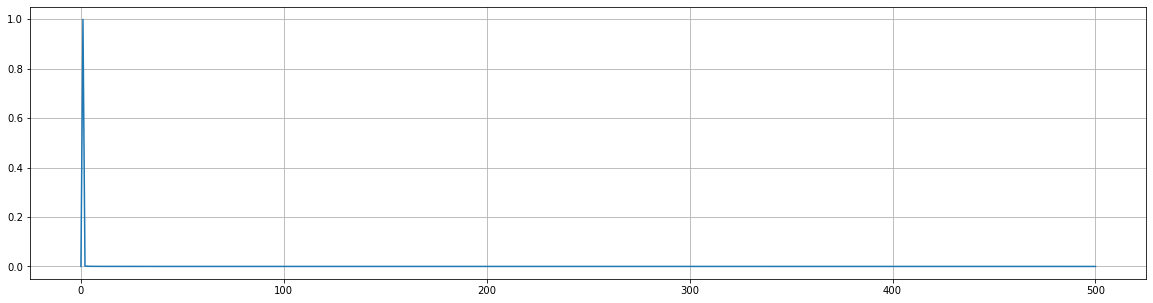

In [93]:
# odstęp próbkowanie
T = 1.0 / N
yf = fft.fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

### Zadanie 1
Wygeneruj sygnał sinusoidalny składający się z dwóch lub więcej składowych o różnych częstotliwościach. Zwizualizuj sygnał i dokonaj jego analizy z wykorzystaniem FFT. 


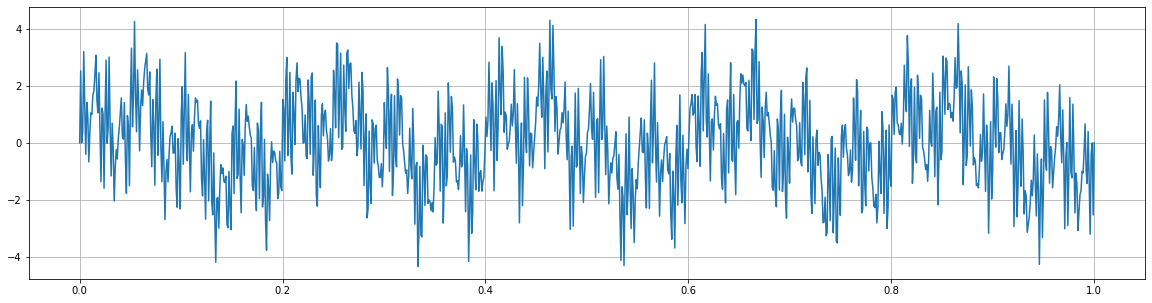

In [94]:
F = [5, 20, 80, 320, 1280]
ft = np.sin(2*np.pi*t*F[0]) + np.sin(2*np.pi*t*F[1]) + np.sin(2*np.pi*t*F[2]) + np.sin(2*np.pi*t*F[3]) + np.sin(2*np.pi*t*F[4])
plt.plot(t,ft)
plt.grid()
plt.show()

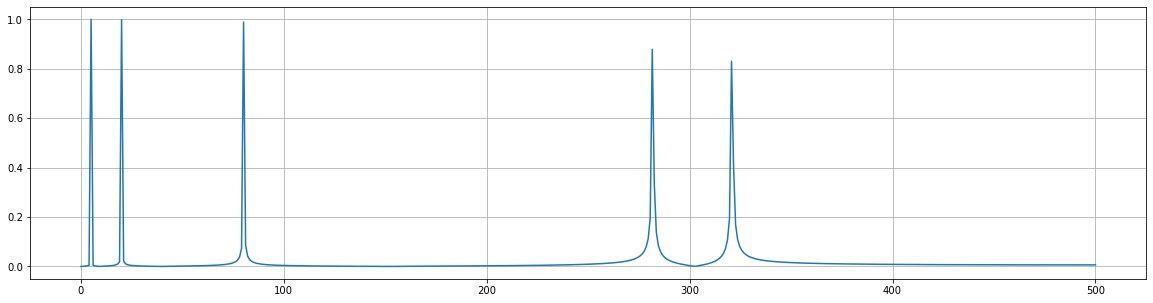

In [95]:
# odstęp próbkowanie
T = 1.0 / N
yf = fft.fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

### Zadanie 2
Odszumianie sygnału. 
1. Wypełniamy tablicę wartościami funkcji sinus ("sygnał") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand().    

In [96]:
from random import random

F = 8
ft = []

for i in t:
    ft.append(np.sin(np.sin(2*np.pi*i*F) + random()))

2. Proszę narysować wykres zaszumionej funkcji.

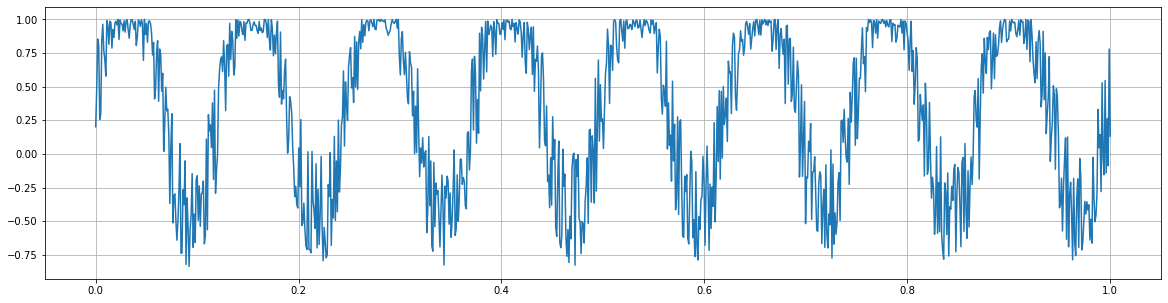

In [97]:
plt.plot(t, ft)
plt.grid()
plt.show()

3. Wykonać FFT dla takiego sygnału i narysować wykres transformaty Fouriera (widmo) tego sygnału (jak poprzednio). Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału. 

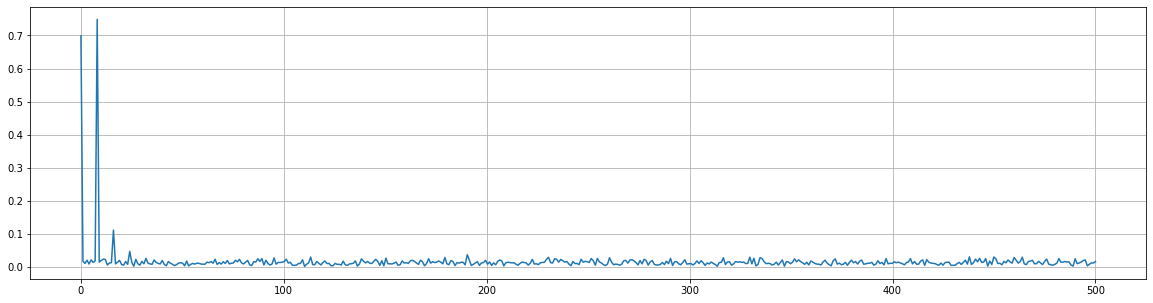

In [98]:
# odstęp próbkowanie
T = 1.0 / N
yf = fft.fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
y = np.abs(yf[0:N//2])

plt.plot(xf, 2.0/N * y)
plt.grid()
plt.show()

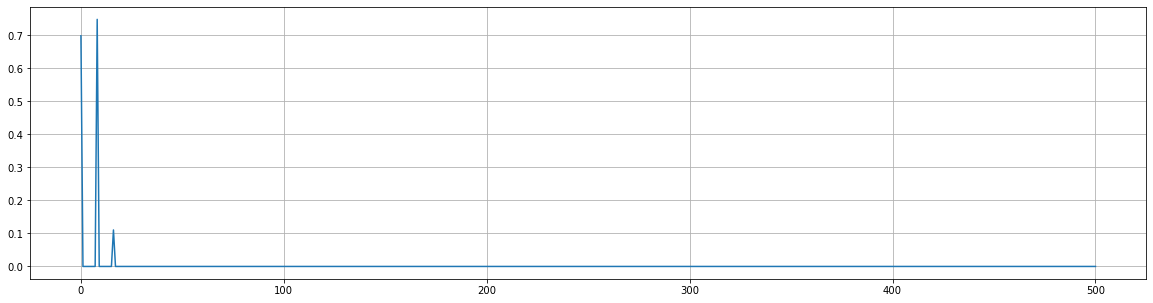

In [99]:
for i in range(len(y)):
    if abs(y[i]) < 50: 
        y[i] = 0

plt.plot(xf, 2.0/N * y)
plt.grid()
plt.show()

4. Przeprowadzić odwrotną transformatę funkcją ifft(). Narysować wykres otrzymanej funkcji dla częsci rzeczywistej. Porównać z wejściowym wykresem sygnału.

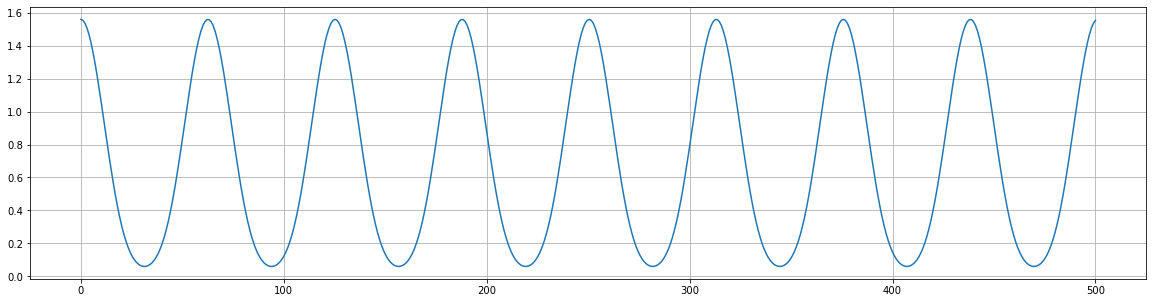

In [100]:
ift = fft.ifft(y)

plt.plot(xf, np.real(ift))
plt.grid()
plt.show()

### Zadanie 3 
Proszę nagrać własny glos lub jakikolwiek inny dźwięk i przenalizowac go przy pomocy FFT (jak powyżej).
Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt.

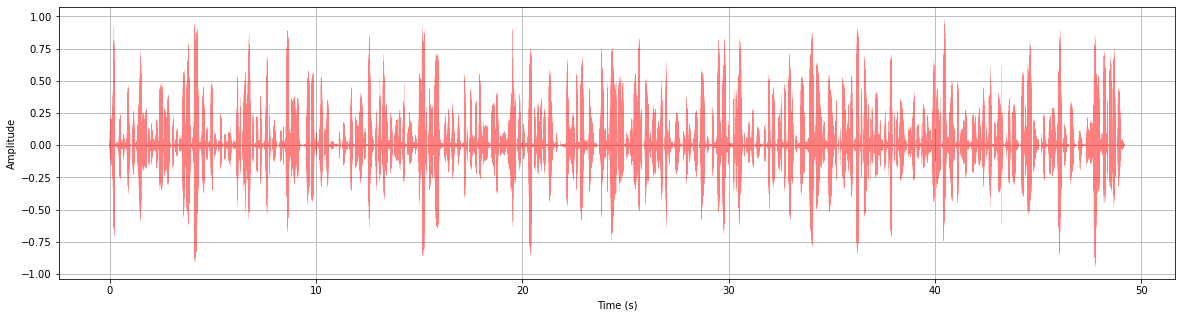

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sample_rate, data = wavfile.read('female.wav')
scaled_data = data/(2.0**15)
time_arr = np.arange(0, float(len(data)), 1)/sample_rate
plt.plot(time_arr, scaled_data, linewidth=0.2, alpha=0.5, color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.savefig('FFT sound analysis.png')
plt.show()

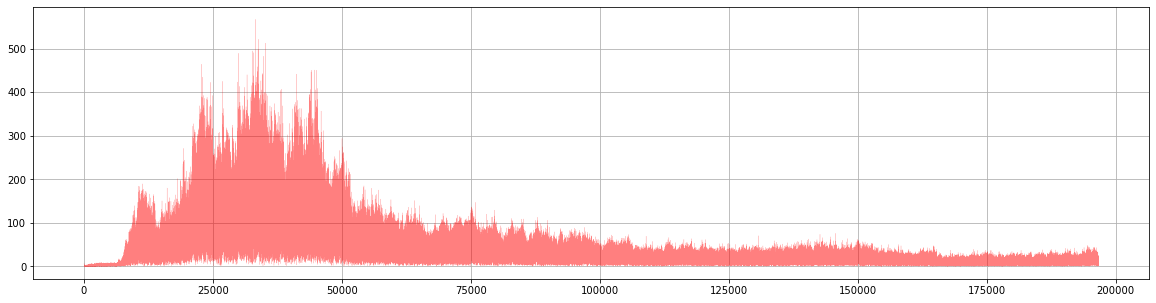

In [102]:
N = len(data)
T = 1.0/N
yf = fft.fft(scaled_data)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
y = np.abs(yf[0:N//2])

plt.plot(xf, y, linewidth=0.2, alpha=0.5, color='red')
plt.grid()
plt.show()

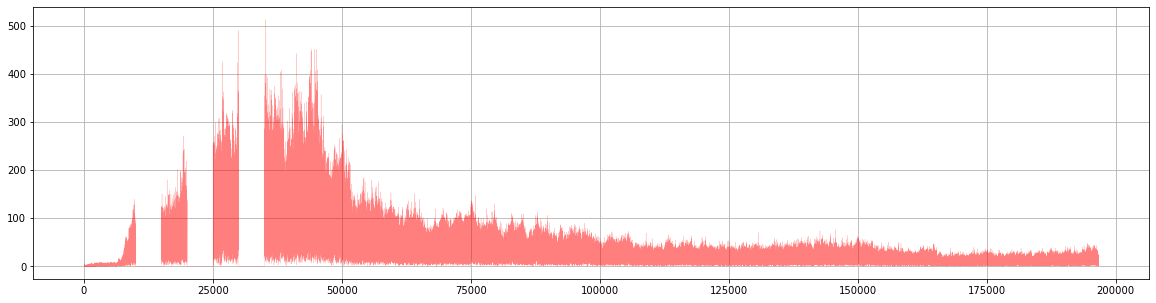

In [103]:
for i in range(len(xf)):
    if 10000 < xf[i] < 15000 or 20000 < xf[i] < 25000 or 30000 < xf[i] < 35000:
        yf[i] = 0
y = np.abs(yf[0:N//2])
        
plt.plot(xf, y, linewidth=0.2, alpha=0.5, color='red')
plt.grid()
plt.savefig('freq_substract.png')
plt.show()

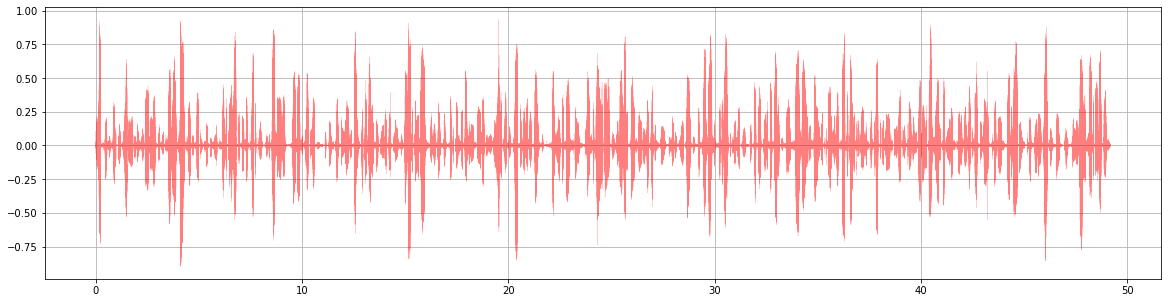

In [104]:
yiff = np.real(fft.ifft(yf))
wavfile.write("sound_ifft.wav", len(yiff), yiff)

plt.plot(time_arr, yiff, linewidth=0.2, alpha=0.5, color='red')
plt.grid()
plt.savefig('sound_ifft.png')
plt.show()